In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-12-15 06:05:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  35.6MB/s    in 2.9s    

2021-12-15 06:05:59 (35.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# unzip the file

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

In [ ]:
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directries, and {len(filenames)} images in '{dirpath}'.")

There are 2 directries, and 0 images in 'pizza_steak'.
There are 2 directries, and 0 images in 'pizza_steak/test'.
There are 0 directries, and 250 images in 'pizza_steak/test/steak'.
There are 0 directries, and 250 images in 'pizza_steak/test/pizza'.
There are 2 directries, and 0 images in 'pizza_steak/train'.
There are 0 directries, and 750 images in 'pizza_steak/train/steak'.
There are 0 directries, and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec 15 06:05 .
drwxr-xr-x 1 root root 4096 Dec 15 06:05 ..
drwxr-xr-x 4 root root 4096 Dec 15 06:05 test
drwxr-xr-x 4 root root 4096 Dec 15 06:05 train


In [ ]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

In [ ]:
# Get class names programatically

import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
# class_names = [item.name for item in data_dir.glob('*')]
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
print(class_names) # note the diffenrence between the print and the output in the above cell

['pizza' 'steak']


In [ ]:
# Now let's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory (we will view images from here)
  target_folder = target_dir + "/" + target_class
  print(f'Target folder: {target_folder}, Target directory as passed: {target_dir}, Target class as passes {target_class}')

  # Get the random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print('\n', random_image, ' \n')

  # read the image and plot it with matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  # plt.axis('off')

  print(f'The shape of the image is {img.shape}.')

  return img

Target folder: pizza_steak/train/steak, Target directory as passed: pizza_steak/train, Target class as passes steak

 ['1995252.jpg']  

The shape of the image is (341, 512, 3).


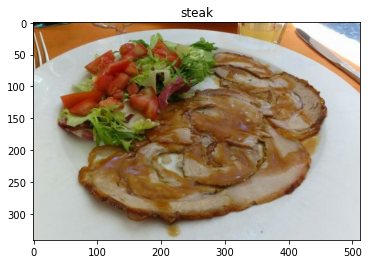

In [ ]:
img = view_random_image('pizza_steak/train', 'steak')

Target folder: pizza_steak/train/pizza, Target directory as passed: pizza_steak/train, Target class as passes pizza

 ['2491110.jpg']  

The shape of the image is (384, 512, 3).


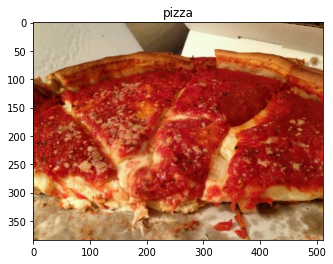

In [ ]:
img_pizza = view_random_image('pizza_steak/train', 'pizza')

In [ ]:
img[0].shape

(512, 3)

In [ ]:
img.shape

(341, 512, 3)

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(341, 512, 3), dtype=uint8, numpy=
array([[[ 11,  11,   0],
        [ 14,  12,   0],
        [ 16,  12,   1],
        ...,
        [120, 154, 182],
        [128, 162, 190],
        [116, 150, 178]],

       [[ 15,  11,   2],
        [ 20,  13,   5],
        [ 21,  14,   6],
        ...,
        [151, 184, 215],
        [169, 203, 231],
        [161, 195, 223]],

       [[ 13,   6,   0],
        [ 11,   4,   0],
        [ 12,   5,   0],
        ...,
        [172, 205, 236],
        [178, 211, 242],
        [166, 200, 228]],

       ...,

       [[204, 210, 208],
        [204, 210, 208],
        [204, 210, 208],
        ...,
        [216, 221, 225],
        [216, 221, 225],
        [216, 221, 225]],

       [[204, 210, 208],
        [204, 210, 208],
        [204, 210, 208],
        ...,
        [216, 221, 225],
        [216, 221, 225],
        [216, 221, 225]],

       [[204, 210, 208],
        [204, 210, 208],
        [204, 210, 208],
        ...,
        [216, 221, 22

In [ ]:
img/255.

array([[[0.04313725, 0.04313725, 0.        ],
        [0.05490196, 0.04705882, 0.        ],
        [0.0627451 , 0.04705882, 0.00392157],
        ...,
        [0.47058824, 0.60392157, 0.71372549],
        [0.50196078, 0.63529412, 0.74509804],
        [0.45490196, 0.58823529, 0.69803922]],

       [[0.05882353, 0.04313725, 0.00784314],
        [0.07843137, 0.05098039, 0.01960784],
        [0.08235294, 0.05490196, 0.02352941],
        ...,
        [0.59215686, 0.72156863, 0.84313725],
        [0.6627451 , 0.79607843, 0.90588235],
        [0.63137255, 0.76470588, 0.8745098 ]],

       [[0.05098039, 0.02352941, 0.        ],
        [0.04313725, 0.01568627, 0.        ],
        [0.04705882, 0.01960784, 0.        ],
        ...,
        [0.6745098 , 0.80392157, 0.9254902 ],
        [0.69803922, 0.82745098, 0.94901961],
        [0.65098039, 0.78431373, 0.89411765]],

       ...,

       [[0.8       , 0.82352941, 0.81568627],
        [0.8       , 0.82352941, 0.81568627],
        [0.8       , 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seed 
tf.random.set_seed(42)

# process the data (get all of the pixel values between 0 & 1, meaning scale the data or normalize the data)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up paths to data directories
train_dir = "/content/pizza_steak/train"
test_dir = 'pizza_steak/test'

# import data from the directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42)

test_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = 'binary',
                                              seed = 42)

# build a CNN model (same as the tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters = 10,
                             kernel_size = 3,
                             activation = 'relu',
                             input_shape = (224,224,3)),
      tf.keras.layers.Conv2D(10,3,activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=2,
                                   padding = 'valid'),
      tf.keras.layers.Conv2D(10,3,activation = 'relu'),
      tf.keras.layers.Conv2D(10,3,activation='relu'),
      tf.keras.layers.MaxPooling2D(2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model

model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 32s 426ms/step - loss: 0.5808 - accuracy: 0.7120 - val_loss: 0.4140 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 17s 368ms/step - loss: 0.4238 - accuracy: 0.8047 - val_loss: 0.3399 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 19s 397ms/step - loss: 0.3880 - accuracy: 0.8273 - val_loss: 0.3255 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 17s 368ms/step - loss: 0.3508 - accuracy: 0.8460 - val_loss: 0.4257 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 16s 350ms/step - loss: 0.3015 - accuracy: 0.8780 - val_loss: 0.3107 - val_accuracy: 0.8600


Target folder: pizza_steak/train/steak, Target directory as passed: pizza_steak/train, Target class as passes steak

 ['1446401.jpg']  

The shape of the image is (512, 512, 3).
Target folder: pizza_steak/train/pizza, Target directory as passed: pizza_steak/train, Target class as passes pizza

 ['543556.jpg']  

The shape of the image is (512, 512, 3).


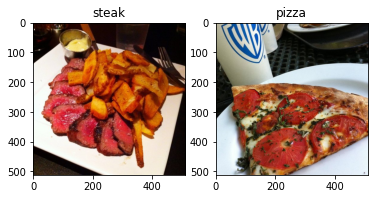

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image(target_dir='pizza_steak/train', target_class='steak')
plt.subplot(122)
pizza_image = view_random_image(target_dir='pizza_steak/train', target_class='pizza')


## 2. process the data prepare it for the model.

One of the main steps in machine learning project to to prepare training and test datasets.
For image classification project, it is standard to have your data separated into `train` and `test` directories with subfolders for in each for every class.
to start we define train and test directory paths

In [ ]:
# define train and test directory paths 
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into batch sizes (**note:** batch sizes are usually done to increase the processing spead of the neural network.)

A batch is small subset of the dataset a model looks at during the training. For example rather than looking at 1000 images at one time and trying to figure out the pattern, a model might look at only 32 images at a given point in time. 

This is done for couple of reasons:
* 1000 images might not fit into the memory of your processor (GPU / CPU)
* Trying to learn patterns of 1000 images at onece could result in model not learning the patterns very well.

Why 32? 

32 is just a number but it has become a industry benchmark for its effectiveness on all types of hardware.

To turn our data into batches. we will first instantiate a [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for each datasets

In [ ]:
# create a ImageDataGenerator for train and test datasets, and scale the data ** very important

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

The `ImageDataGenerator` class helps us prepare our data set into  batches aswell as perform transformations on them as they get loaded into the model.

you might notice the `rescale` parameter. This is one example of the transformation we are doing. 

  **note:** for more Transformation options such as data augmentation please refer to the [ImageDataGenerator Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

Now we have got a couple of ImageDataGenerator objects, we can load their images from their respective directories using the [flow_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) method

In [ ]:
# Turn data into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode = 'binary',
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Looks like our train dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images belonging to 2 classes.

Some things here:
* Due to how our directories are structured calss get infered from our subdirectory names `train_dir` and `test_dir`. Also right now the data is in the same order as it was in the directories. We could have used shuffled parameter to over come that problem we will see that later.
* The `target_size` parameter defines the input size of our images `(height, width)` format.
* The `class_mode` value of `'binary'` defines our classification probelm type. If we had more than two classes we could have uesed `'categorical'`.
* The `batch_size` defines how many images will be in each batch. we have used 32 which is same as default.

We can take a look at our batched images by inspecting the `train_data` object.


In [ ]:
# Get sample data from train_data batch
images,labels = train_data.next()
len(images), len(labels)

(32, 32)

Wonderful looks like our images and labels are in batches of 32.

let's see what images looklike

In [ ]:
test_images, test_labels = test_data.next()
test_images[0], test_images[0].shape

(array([[[0.35686275, 0.2392157 , 0.19607845],
         [0.34509805, 0.23137257, 0.1764706 ],
         [0.31764707, 0.21568629, 0.16470589],
         ...,
         [0.07843138, 0.05882353, 0.04705883],
         [0.09019608, 0.06666667, 0.06666667],
         [0.1137255 , 0.07843138, 0.08235294]],
 
        [[0.3372549 , 0.22352943, 0.16862746],
         [0.33333334, 0.21960786, 0.15686275],
         [0.28235295, 0.18039216, 0.12156864],
         ...,
         [0.07843138, 0.05882353, 0.04705883],
         [0.09803922, 0.0627451 , 0.06666667],
         [0.1137255 , 0.07843138, 0.08235294]],
 
        [[0.34117648, 0.21568629, 0.15686275],
         [0.34509805, 0.21960786, 0.16078432],
         [0.28627452, 0.1764706 , 0.12156864],
         ...,
         [0.08627451, 0.05490196, 0.04705883],
         [0.09803922, 0.06666667, 0.05882353],
         [0.11764707, 0.07843138, 0.08235294]],
 
        ...,
 
        [[0.227451  , 0.10588236, 0.09803922],
         [0.23137257, 0.1137255 , 0.10588

In [ ]:
# get images (first 2 images)

images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

Due to `target_size` parameter our images are now in (224,224,3) shape tensors.

Due to `rescale` parameter our tensors have a normalized value between 0,1.

How about labels?

In [ ]:
# view the first batch of labels
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

Due to the `class_mode` parameter being `binary` our labels are either `0`(pizza) or `1`(steak)

let us check the out

Text(0.5, 1.0, 'Image belongs to class 0.0')

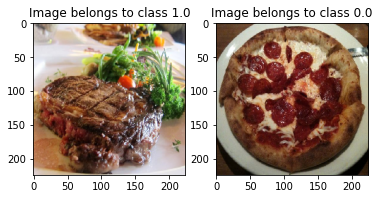

In [ ]:
plt.figure()
plt.subplot(121)
plt.imshow(test_images[2])
plt.title(f'Image belongs to class {labels[2]}')
plt.subplot(122)
plt.imshow(test_images[-3])
plt.title(f'Image belongs to class {labels[-3]}')

Now that is is clear that the labels are 
* 0 - pizza
* 1 - steak ( mostly it appears that labels are given in alphabetical order)


now that our data is ready our model is going to try and figure out the patterns between image tensors and labels.

## 3. Create a model(start with a baseline)

you might be wondering what your default model architecture should be. 

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architechture which is performing best on [imagenet](https://www.image-net.org/) (a large collection of diverse images to bench mark different computer vision models)

However to bigin with, it is good to build a smaller model to acquire a baseline result which you try to improve upon.
    **note:** In deep learning a smaller model often refers to a model with less layers than the state of art(SOTA). For example a smaller model may have 3-4 layers where are state of the art model, such as, ResNet50 would have 50+ layers. 

In our case, let's take a smaller version of the model that can be found on the [CNN explainer website](https://poloclub.github.io/cnn-explainer/) (`model_1 from above) and build a 3 layer Convolutional neural network

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# create a model which will act as our baseline model - a 3 layer convolutional neural network

model_4 =  Sequential([
    Conv2D(filters=10,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           activation = 'relu',
           input_shape = (224,224,3)),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

Great! we have simple Convolutional neural network architechture ready to go

`Input -> Conv + ReLU layers (non linearities) -> Pooling layer -> fully connected Dense layer as output`

Let's discuss some of componets of `Conv2D layer`:

* The "`2D`" means our inputs are two dimentional (height, width), even though they have three colour chanels, the convolutions are run on each channel individually.
* `filters` - these are the number of feature extractors that will be moving our our images. 
* `kernel_size` - is the size of our filters, for example kernel size of (3,3) (or just 3) will mean each filter will be a grid of 3X3. meaning it will look at the space of 3x3 pixels from the image. the smaller the filter, the more fine grained features will be extracted.
* `stride` - the number of pixels a `filter` will move accross as it covers the image. A `stride` of 1 means the filter moves accross each pixel 1 by 1. A `stride` of 2 means 2 pixels at a time. 
* `padding` - padding at the edges of the images in order to fecilitate filters to learn from the edges efficiently, this can be either `'same'` or `'valid'`, `'same'` will add the padding such that the resultant output will be of same size as input.

resources:

* [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - A great over visual overview of many of the conncepts in Convolutional neural networks.
* [A guide to Convolutional arithmatic for deep learning - research paper](https://arxiv.org/pdf/1603.07285.pdf) - a phenominal introduction to math going on behind the scenes.

now that our model is ready let's compile it.

In [ ]:
# Compile the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

Since we are working on a binary classification problem loss will be `'binary_crossentropy'`. If it was multiclass we might use `'categorical_crossentropy'`


In [ ]:
# fit the model
histroy_4 = model_4.fit(train_data,
            epochs = 3,
            steps_per_epoch = len(train_data),
            validation_data = test_data)
            # validation_steps = len(test_data))

Epoch 1/3
47/47 [==============================] - 13s 261ms/step - loss: 1.0961 - accuracy: 0.6333 - val_loss: 0.4962 - val_accuracy: 0.7660
Epoch 2/3
47/47 [==============================] - 12s 252ms/step - loss: 0.4691 - accuracy: 0.7860 - val_loss: 0.4209 - val_accuracy: 0.8040
Epoch 3/3
47/47 [==============================] - 12s 256ms/step - loss: 0.3629 - accuracy: 0.8520 - val_loss: 0.4218 - val_accuracy: 0.8220


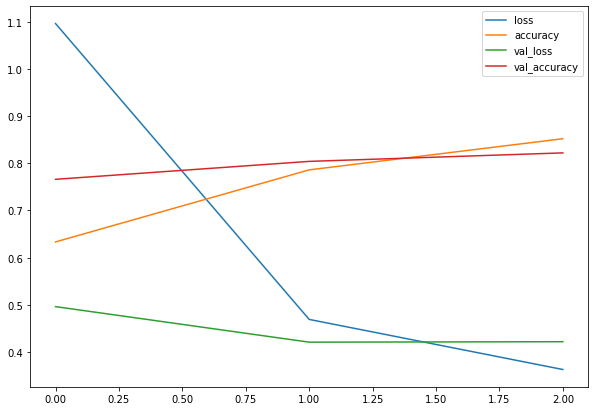

In [ ]:
import pandas as pd

pd.DataFrame(histroy_4.history).plot(figsize = (10,7))

In [ ]:
# define custom loss plotting function
def plot_loss_curves(history):
  """
  Retruns the separate plots for train and test loss curves
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.figure(figsize = (14,7))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label = 'training loss')
  plt.plot(epochs, val_loss, label = 'validation loss')
  plt.title('loss')
  plt.xlabel('epoch')
  plt.legend()

  # plot accuracy
  # plt.figure(figsize = (7,7))
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label = 'training accuracy')
  plt.plot(epochs, val_accuracy, label = 'validation accuracy')
  plt.title('accuracy')
  plt.xlabel('epoch')
  plt.legend()

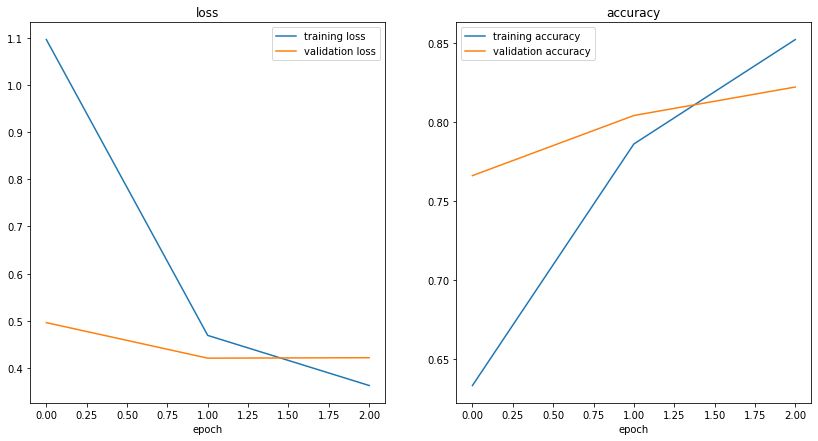

In [ ]:
# plot loss curves 
plot_loss_curves(histroy_4)

As we can see that the validation loss is increasing while the trining loss is reducing we can conculde that the model is overfitting. Ideally the validation loss curve should be just under the training loss curve. The is the idea scenario

In [ ]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


So what can we do to improve the model.

Generally the model training involves three phases
1. Build a baseline (simple model) model
2. Beat the baseline model by increasing complexity or by increasing training time or by tuning other hyper parameters. Objective is to overfit the model.
3. Reduce the overfitting by regularization techniques.

As we can see our model is already overfitting let us regularize the model. One such way is to introduce Maxpool2D layer in our model.

In [ ]:
from tensorflow.keras.layers import MaxPool2D

In [ ]:
# build model
model_5 = Sequential([
    Conv2D(10,3,activation = 'relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_5.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# fit the model

history_5 = model_5.fit(train_data,
            epochs = 5,
            validation_data = test_data)

Epoch 1/5
47/47 [==============================] - 11s 229ms/step - loss: 0.6435 - accuracy: 0.6073 - val_loss: 0.5585 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.5184 - accuracy: 0.7433 - val_loss: 0.4351 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4262 - accuracy: 0.8047 - val_loss: 0.3907 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4018 - accuracy: 0.8233 - val_loss: 0.3351 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 10s 224ms/step - loss: 0.3777 - accuracy: 0.8420 - val_loss: 0.3239 - val_accuracy: 0.8600


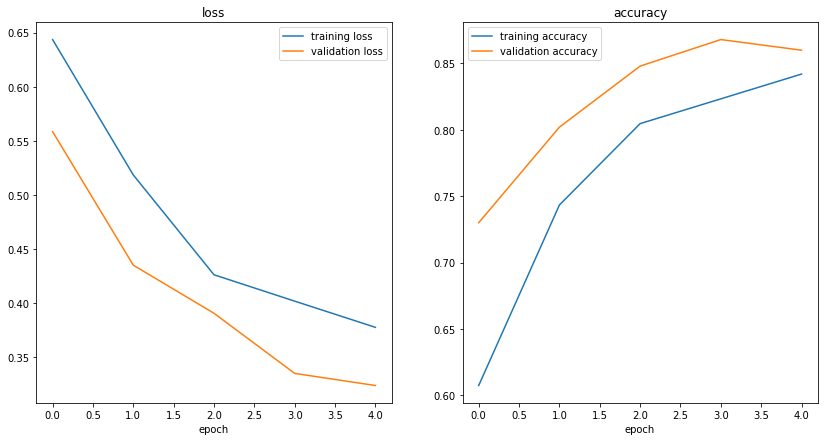

In [ ]:
plot_loss_curves(history_5)

In [ ]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 26, 10)      

Dit you notice that in the last model we had around 477 thousand parms and the val accuracy was 82%.

where as the model 5 has total parms of 8800 and the accuracy is 81.6.

So, introducing maxpool layer helped us improve the model accuray and reduce the model complexity.

Now that we see that the loss curves got closer to each other. However our validation accuracy tends to fall in the end.

Time to dig into our bag of tricks and try another method of overfitting preventions, data augmentation.

To implement data augmentation we need to reinstantiate our Image generator instances

In [ ]:
# Create a ImageDataGenerator trining instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 20,
                                             shear_range = .2,
                                             zoom_range = .2,
                                             width_shift_range = .2,
                                             height_shift_range = .2,
                                             horizontal_flip = True)

# Create a ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Create a ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale = 1./255)

Question: What is data augmentation?

**Data Augmentation** is the process of altering our training data, leading to, it having more diversity there by letting our model learn more (basically the vaiation of the same data)

Altering means flipping, rotating, moving, cropping, realigning etc.

In the real world the pictures are taken from any angle and may contain more object in the images and also the zoom can very even the position of the object we are interested in may be different.

**Note** Data augmentation is usually performed on training data. Using ImageDataGenerator's builtin data augmentation parameters. Our images are left as it is in the directories, however, the dataaugmentation is implemented randomly while loading the images into the model.

In [ ]:
# Import data and augment it from training directory
print('Augmented Training images:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                     target_size = (224,224),
                                                                     batch_size = 32,
                                                                     class_mode = 'binary',
                                                                     shuffle = False)

# create non augmented data batches
print('unaugmented training images:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = False)

print('unaugmented test images')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'binary',
                                             shuffle = False)

Augmented Training images:
Found 1500 images belonging to 2 classes.
unaugmented training images:
Found 1500 images belonging to 2 classes.
unaugmented test images
Found 500 images belonging to 2 classes.


In [ ]:
augmented_images, augmented_labels = train_data_augmented.next()
images,labels = train_data.next()

Text(0.5, 1.0, 'augmented image')

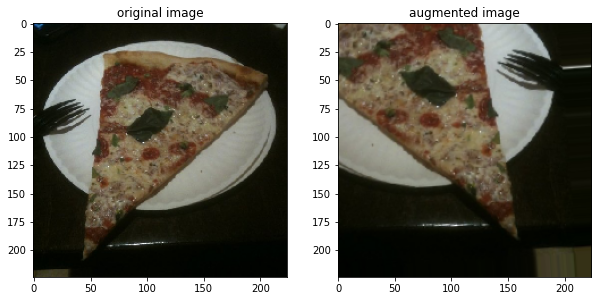

In [ ]:
random_number = random.randint(0,32)
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(images[random_number])
plt.title(f'original image')
plt.subplot(122)
plt.imshow(augmented_images[random_number])
plt.title(f'augmented image')

In [ ]:
# Build a model with augmented data we will use same model as model_5
model_6 = Sequential([
    Conv2D(10,3, activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation= 'sigmoid')
])

# Compile the model
model_6.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# fit the model

history_6 = model_6.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 557ms/step - loss: 0.7797 - accuracy: 0.3473 - val_loss: 0.6920 - val_accuracy: 0.5120
Epoch 2/5
47/47 [==============================] - 29s 616ms/step - loss: 0.6943 - accuracy: 0.5053 - val_loss: 0.6873 - val_accuracy: 0.5880
Epoch 3/5
47/47 [==============================] - 26s 558ms/step - loss: 0.6788 - accuracy: 0.6233 - val_loss: 0.6252 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 26s 557ms/step - loss: 0.6868 - accuracy: 0.5207 - val_loss: 0.6349 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 26s 557ms/step - loss: 0.8666 - accuracy: 0.6587 - val_loss: 0.6715 - val_accuracy: 0.6060


**Question** why did our model did not get good results on training data to begin with??

It is because we turned off the data shuffling using shuffle parameter. that means our model will see the images in sequential order meaning each batch will show it one type of image. probably first all pizzas will be learnt and then all steaks will be learn makeing it forget about pizza.

In [ ]:
# del model_6

In [ ]:
# Check the labes in the augmented data.
augmented_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

As stated above all the images in one batch belong to the same class. hence the low accuracy.

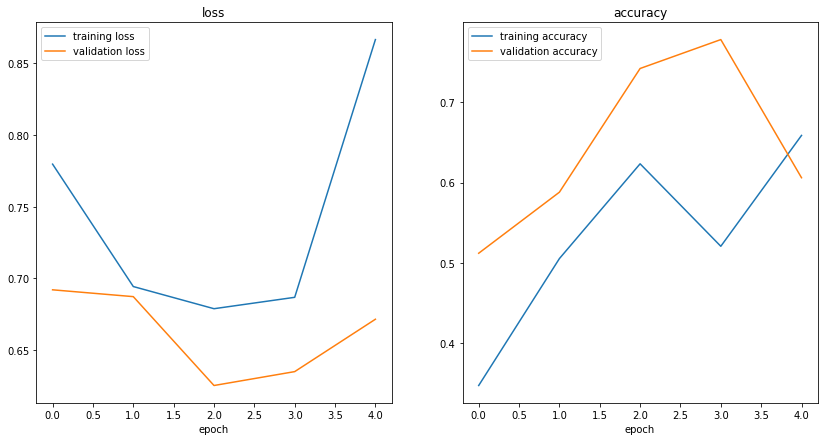

In [ ]:
plot_loss_curves(history_6)

our validation loss curve is in the right direction but not stable. 

let us see what happens if we shuffle the data

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224,224),
                                                                            batch_size = 32,
                                                                            class_mode = 'binary',
                                                                            shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
images, labels = train_data_augmented_shuffled.next()
labels

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.],
      dtype=float32)

In [ ]:
images[0]

array([[[0.9393555 , 0.93919796, 0.93147296],
        [0.6075408 , 0.5936816 , 0.59623283],
        [0.22071134, 0.20249517, 0.22163942],
        ...,
        [0.94430476, 0.9450981 , 0.94529647],
        [0.93060297, 0.9450981 , 0.9487218 ],
        [0.92002887, 0.93571514, 0.9396367 ]],

       [[0.84659016, 0.8424275 , 0.8368028 ],
        [0.4405279 , 0.42459825, 0.42973652],
        [0.13299279, 0.11363773, 0.1359032 ],
        ...,
        [0.9415043 , 0.9450981 , 0.9459965 ],
        [0.9282049 , 0.94389117, 0.94781274],
        [0.9179286 , 0.93361485, 0.9375364 ]],

       [[0.7722602 , 0.7640199 , 0.7604955 ],
        [0.3930285 , 0.37639874, 0.38503754],
        [0.1006402 , 0.08128995, 0.10526668],
        ...,
        [0.93870395, 0.9450981 , 0.94669664],
        [0.9261046 , 0.9417909 , 0.94571245],
        [0.9206785 , 0.9363648 , 0.9402864 ]],

       ...,

       [[0.95532256, 0.93935597, 0.921849  ],
        [0.95431757, 0.94255286, 0.922945  ],
        [0.9622209 , 0

In [ ]:
model_7 = Sequential([
   Conv2D(10,3, activation = 'relu', input_shape = (224,224,3)),
   MaxPool2D(),
   Conv2D(10,3, activation = 'relu'),
   MaxPool2D(),
   Conv2D(10,3, activation = 'relu'),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation='sigmoid')
])

model_7.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 556ms/step - loss: 0.6671 - accuracy: 0.5873 - val_loss: 0.6109 - val_accuracy: 0.6020
Epoch 2/5
47/47 [==============================] - 26s 544ms/step - loss: 0.5444 - accuracy: 0.7340 - val_loss: 0.4029 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 25s 533ms/step - loss: 0.5056 - accuracy: 0.7627 - val_loss: 0.4032 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 25s 535ms/step - loss: 0.4967 - accuracy: 0.7647 - val_loss: 0.3686 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 26s 545ms/step - loss: 0.4810 - accuracy: 0.7680 - val_loss: 0.3517 - val_accuracy: 0.8380


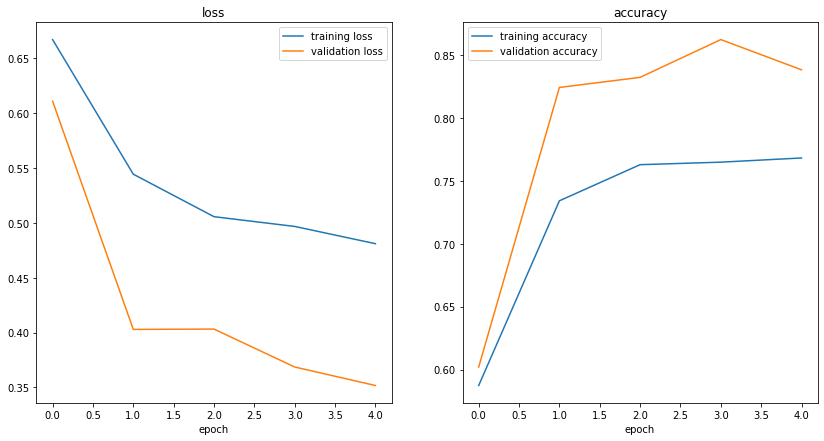

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_8 = Sequential([
    Conv2D(10,3,activation = 'relu', input_shape = (224,224,3)),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    # Conv2D(10,3, activation = 'relu'),
    # Conv2D(10,3, activation = 'relu'),
    # MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_8.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])


history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        validation_data = test_data)

Epoch 1/5
47/47 [==============================] - 27s 567ms/step - loss: 0.6574 - accuracy: 0.6200 - val_loss: 0.5433 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 27s 568ms/step - loss: 0.5630 - accuracy: 0.7220 - val_loss: 0.4316 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 27s 583ms/step - loss: 0.5052 - accuracy: 0.7600 - val_loss: 0.3960 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 33s 693ms/step - loss: 0.4993 - accuracy: 0.7727 - val_loss: 0.3934 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 34s 724ms/step - loss: 0.4914 - accuracy: 0.7820 - val_loss: 0.4401 - val_accuracy: 0.7900


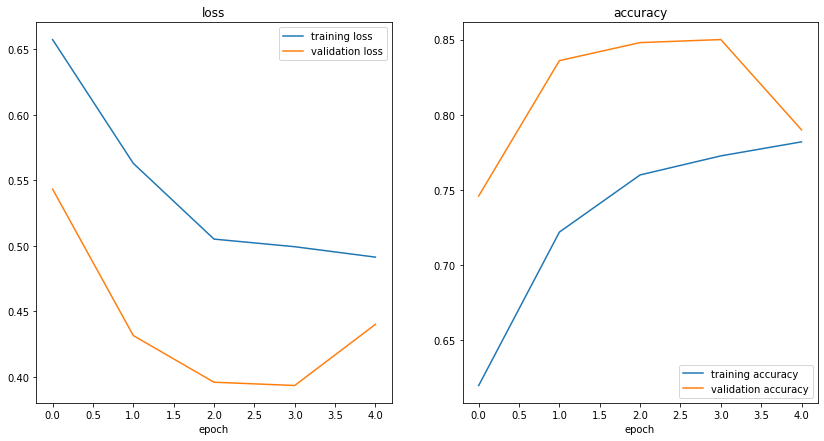

In [ ]:
plot_loss_curves(history_8)

In [ ]:
model_8.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_51 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_53 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [ ]:
# del model_8

--2021-12-15 08:09:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2021-12-15 08:09:05 (26.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



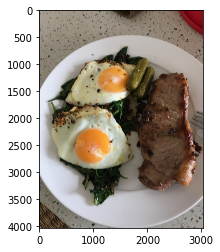

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
# plt.axis(False);

In [ ]:
# Create a function to import an image and resize it to be used in our model
def load_and_prep_image(filename, img_shape = 224):
  """
  Reads an image from the filename, turns it into a tensor
  and reshapes it to (img_shape,img_shape,colour_channel)
  """
  # read the target file (an image)
  image = tf.io.read_file(filename)
  # print(image, '-------', image.shape)

  # Decode the read file into a tensor and ensure 3 color channels
  # our model is trained on three color channels sometimes images have 4 channels.
  image = tf.image.decode_image(image, channels = 3)
  # print('\n\n',image, "------", image.shape)

  # Resize the image (to the same size our model was trained on)
  image = tf.image.resize(image, size = [img_shape,img_shape,])
  # print('\n\n', image, '-----', image.shape)

  # Rescale the image (get all values between 0 and 1)
  image = image/255

  # Reshape it to add batch size to the tensor
  image = tf.expand_dims(image, axis = 0)
  return image

In [ ]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
# image = tf.io.read_file('03-steak.jpeg')
# image

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00H\x00H\x00\x00\xff\xe1\x07vExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x08\x01\x0f\x00\x02\x00\x00\x00\x06\x00\x00\x00n\x01\x10\x00\x02\x00\x00\x00\t\x00\x00\x00t\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00~\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00\x86\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x05\x00\x00\x00\x8e\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\x94\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\xa8\x00\x00\x00\x00Apple\x00iPhone 7\x00\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x0113.3\x00\x002020:01:14 14:23:00\x00\x00"\x82\x9a\x00\x05\x00\x00\x00\x01\x00\x00\x02F\x82\x9d\x00\x05\x00\x00\x00\x01\x00\x00\x02N\x88"\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x88\'\x00\x03\x00\x00\x00\x01\x00@\x00\x00\x90\x00\x00\x07\x00\x00\x00\x040231\x90\x03\x00\x02\x00\x00\x00\x14\x00\x00\x02V\x90\x04\x00\x02\x00\x00\x00\x14\x00\x00\x02j\x90\x10\x00\x02\x00\x00\x00\x07\x

In [ ]:
# image = tf.image.decode_image(image, channels = 3)
# image

<tf.Tensor: shape=(4032, 3024, 3), dtype=uint8, numpy=
array([[[162, 158, 149],
        [163, 159, 150],
        [165, 161, 152],
        ...,
        [134,  18,  21],
        [138,  22,  25],
        [138,  22,  25]],

       [[163, 159, 150],
        [163, 159, 150],
        [164, 160, 151],
        ...,
        [130,  14,  17],
        [131,  15,  18],
        [134,  18,  21]],

       [[165, 161, 152],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [133,  16,  22],
        [132,  15,  21],
        [133,  16,  22]],

       ...,

       [[151, 131, 107],
        [140, 120,  96],
        [ 99,  81,  59],
        ...,
        [164, 155, 146],
        [151, 142, 133],
        [139, 130, 121]],

       [[139, 117,  93],
        [136, 116,  91],
        [103,  85,  61],
        ...,
        [156, 147, 138],
        [141, 131, 122],
        [138, 128, 119]],

       [[146, 125,  98],
        [147, 127, 100],
        [113,  93,  69],
        ...,
        [152, 143, 

In [ ]:
pred_proba = model_8(steak)
pred_proba

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.9000701]], dtype=float32)>

In [ ]:
pred_class = class_names[int(tf.round(pred_proba[0][0]))]
pred_class

'steak'

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Import an image located at a file name, makes a prediction on it with a trained model
  and plots the image with the predicted label as title
  """
  # import the target image and process use the custom defined function previously
  img = load_and_prep_image(filename)

  # Make predition
  pred_proba = model.predict(img)

  # Get the predicted class 
  pred_class = class_names[int(tf.round(pred_proba[0][0]))]

  # Plot the image and predicted class
  plt.imshow(tf.squeeze(img))
  plt.title(f'prediction: {pred_class}')

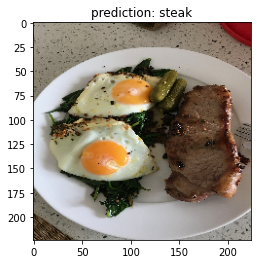

In [ ]:
pred_and_plot(model_8, '03-steak.jpeg', class_names)

--2021-12-15 08:42:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2021-12-15 08:42:41 (34.8 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



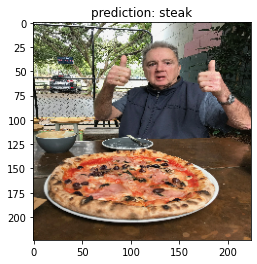

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)